<a href="https://colab.research.google.com/github/brittanyasare04/visualization_assignment/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Visualization
### `! git clone https://github.com/ds3001f25/visualization_assignment.git`
### Do Q1 and Q2.

**Q1.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use the pretrail data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform
$$
k(z) = \begin{cases}
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is
$$
k(z) = \begin{cases}
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.

In [2]:
! git clone https://github.com/ds3001f25/visualization_assignment.git

Cloning into 'visualization_assignment'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 10 (delta 0), reused 8 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (10/10), 1.88 MiB | 10.98 MiB/s, done.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Loading in the pretrial data
pretrial = pd.read_csv('./visualization_assignment/data/pretrial_data.csv')

Calculated bandwidth (h): 1.5062184910771579
Data range (min, max): (18.0, 100.0)
First 10 KDE values: [0.008201   0.01154579 0.01532904 0.01928372 0.02311229 0.02655688
 0.02945283 0.03174716 0.03348109 0.03475131]


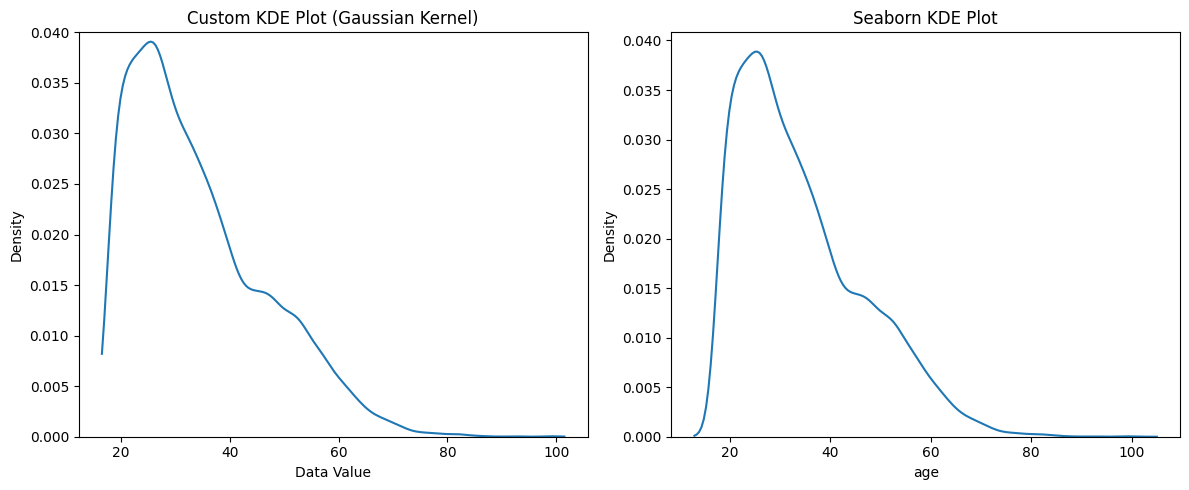

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def gaussian_kernel(z):
  """Gaussian kernel function."""
  return (1 / np.sqrt(2 * np.pi)) * np.exp(-z**2 / 2)

def uniform_kernel(z):
  """Uniform (boxcar) kernel function."""
  return 0.5 * ((np.abs(z) <= 1).astype(float))

def epanechnikov_kernel(z):
  """Epanechnikov kernel function."""
  return 0.75 * (1 - z**2) * ((np.abs(z) <= 1).astype(float))

def silverman_bandwidth(data):
  """Calculates Silverman's bandwidth."""
  n = len(data)
  iqr = np.percentile(data, 75) - np.percentile(data, 25)
  std_dev = np.std(data)
  # Use min(std_dev, IQR/1.34) as the estimate of scale, as suggested by Silverman
  scale = min(std_dev, iqr / 1.34)
  return 0.9 * scale * (n ** -0.2)

def custom_kdeplot(data, kernel='gaussian', bandwidth='silverman', ax=None, **kwargs):
  """
  Generates a kernel density plot.

  Args:
    data: Pandas Series or Numpy array.
    kernel: Type of kernel to use ('gaussian', 'uniform', 'epanechnikov').
    bandwidth: Bandwidth to use ('silverman' or a float value).
    ax: Matplotlib axes object to plot on. If None, a new figure and axes are created.
    **kwargs: Additional keyword arguments for the line plot.
  """
  if not isinstance(data, (pd.Series, np.ndarray)):
    raise TypeError("Input data must be a Pandas Series or Numpy array.")

  # Drop NaN values
  data = data.dropna()

  if ax is None:
    fig, ax = plt.subplots()

  # Choose kernel function
  if kernel == 'gaussian':
    kernel_func = gaussian_kernel
  elif kernel == 'uniform':
    kernel_func = uniform_kernel
  elif kernel == 'epanechnikov':
    kernel_func = epanechnikov_kernel
  else:
    raise ValueError("Invalid kernel type. Choose from 'gaussian', 'uniform', or 'epanechnikov'.")

  # Calculate bandwidth
  if bandwidth == 'silverman':
    h = silverman_bandwidth(data)
  elif isinstance(bandwidth, (int, float)):
    h = bandwidth
  else:
    raise ValueError("Invalid bandwidth type. Choose 'silverman' or a float value.")

  print(f"Calculated bandwidth (h): {h}")


  # Create a range of points to evaluate the KDE
  x_min, x_max = data.min(), data.max()

  print(f"Data range (min, max): ({x_min}, {x_max})")

  x_range = np.linspace(x_min - h, x_max + h, 200) # Evaluate over a wider range

  # Calculate KDE
  kde_values = np.zeros_like(x_range)
  for x_i in data:
    kde_values += kernel_func((x_range - x_i) / h)

  kde_values /= (len(data) * h)

  print(f"First 10 KDE values: {kde_values[:10]}")


  # Plot KDE
  ax.plot(x_range, kde_values, **kwargs)
  ax.set_xlabel('Data Value')
  ax.set_ylabel('Density')
  ax.set_title(f'Custom KDE Plot ({kernel} kernel, bandwidth={h:.4f})')
  ax.set_ylim(0, 0.04) # Set y-axis limit based on Seaborn plot

  return ax

# Use the pretrial data to demonstrate the function
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Custom KDE plot
custom_kdeplot(pretrial['age'], ax=ax[0], label='Custom KDE')
sns.kdeplot(pretrial['age'], ax=ax[1], label='Seaborn KDE')

ax[0].set_title('Custom KDE Plot (Gaussian Kernel)')
ax[1].set_title('Seaborn KDE Plot')

plt.tight_layout()
plt.show()

In [7]:
display(pretrial.columns)

Index(['Unnamed: 0', 'case_type', 'age', 'sex', 'race', 'is_poor', 'bond',
       'bond_type', 'prior_F', 'prior_M', 'gini', 'released', 'sentence_type',
       'sentence', 'bond_NA', 'held_wo_bail', 'sentence_NA'],
      dtype='object')

**Q2.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [8]:
#Loading in the college completion data
college_completion = pd.read_csv('./visualization_assignment/data/college_completion.csv')

In [12]:
# Dimension of the college completion data
print("Shape:", college_completion.shape)
print("Variable:", college_completion.columns)
college_completion.head(10)

Shape: (3798, 63)
Variable: Index(['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control',
       'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
       'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
       'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
       'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
       'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
       'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
       'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
       'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first',
       'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first',
       'vsa_enroll_after6_first', 'vsa_enroll

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0
5,5,100751,University of Alabama at Tuscaloosa,Tuscaloosa,Alabama,4-year,Public,Research Universities--high research activity,NaN,X,...,61.5,8.5,6.3,5.5,183044|209551|240727|207388|178402|185828|2380...,13,96,75.9|07,NaN,4438.0
6,6,100760,Central Alabama Community College,Alexander City,Alabama,2-year,Public,Associates--Public Rural-serving Medium,NaN,NaN,...,NaN,NaN,NaN,NaN,217712|227225|198491|175935|107460|206923|2407...,25,289,66.7|10,NaN,594.0
7,7,100830,Auburn University at Montgomery,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,NaN,NaN,...,NaN,NaN,NaN,NaN,229814|210429|160038|176965|169798|207263|1023...,13,386,43.8|07,AUM,536.0
8,8,100858,Auburn University,Auburn University,Alabama,4-year,Public,Research Universities--high research activity,NaN,NaN,...,72.2,9.7,2.0,4.6,223232|204024|163268|165334|132903|171128|1961...,13,96,75.5|07,NaN,4165.0
9,9,100937,Birmingham-Southern College,Birmingham,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,174747|153144|143084|152390|168591|199111|1406...,16,252,88.9|07,BSC,449.0


There are 3768 observations, and 63 variables. Some of these include:city, state, control, level, hbcu, & flagship.

In [13]:
#cross tabulate the variables level and control
pd.crosstab(college_completion['level'], college_completion['control'])

control,Private for-profit,Private not-for-profit,Public
level,,,
2-year,465,68,926
4-year,527,1180,632


The pattern we can see is that those who complete 2 year college mainly attend public schools, while the 4 year colleges are typically Private, not-for-profit schools.

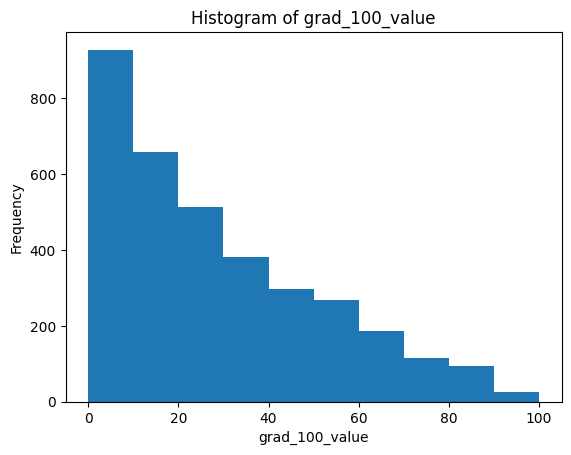

In [14]:
# Creating a histogram for the variable grad_100_value
plt.hist(college_completion['grad_100_value'])
plt.xlabel('grad_100_value')
plt.ylabel('Frequency')
plt.title('Histogram of grad_100_value')
plt.show()

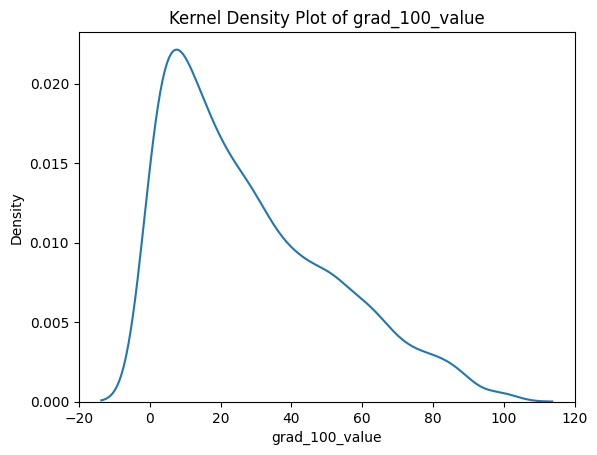

In [15]:
# creating a kernel density plot for grad_100_value
sns.kdeplot(college_completion['grad_100_value'])
plt.xlabel('grad_100_value')
plt.ylabel('Density')
plt.title('Kernel Density Plot of grad_100_value')
plt.show()

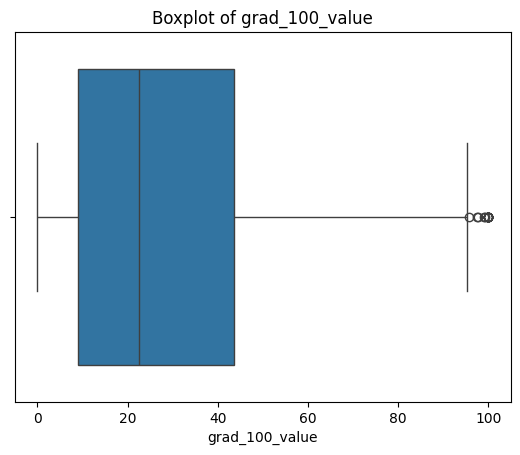

In [16]:
# creating a boxplot for the variable grad_100_value
sns.boxplot(x=college_completion['grad_100_value'])
plt.xlabel('grad_100_value')
plt.title('Boxplot of grad_100_value')
plt.show()

In [18]:
# creating a statistical description for grad_100_value
college_completion['grad_100_value'].describe()

,grad_100_value
count,3467.000000
mean,28.364465
std,23.312730
min,0.000000
25%,9.000000
50%,22.500000
75%,43.650000
max,100.000000


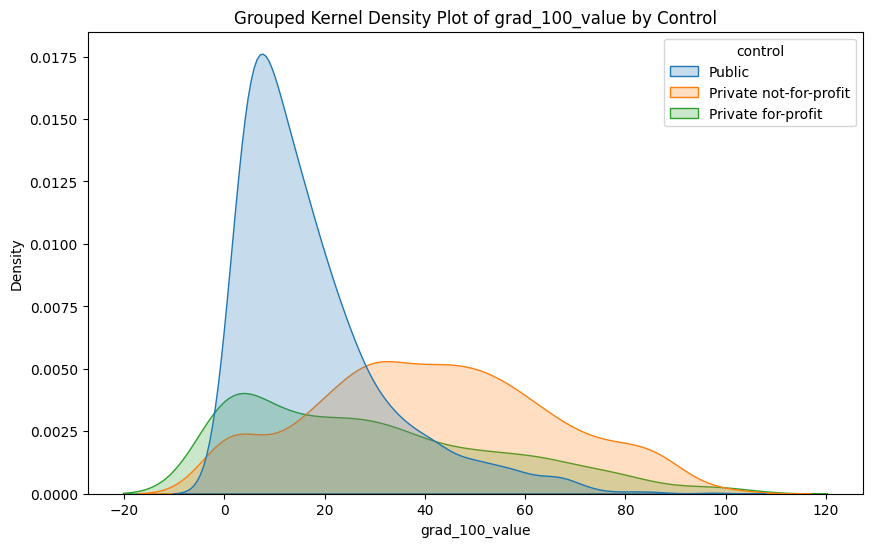

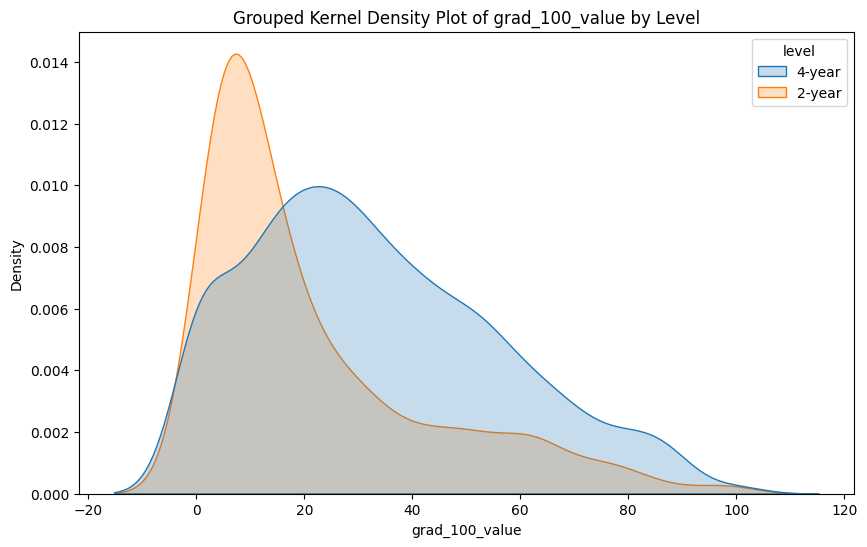

In [19]:
# Grouped kernel density plot by control
plt.figure(figsize=(10, 6))
sns.kdeplot(data=college_completion, x='grad_100_value', hue='control', fill=True)
plt.title('Grouped Kernel Density Plot of grad_100_value by Control')
plt.xlabel('grad_100_value')
plt.ylabel('Density')
plt.show()

# Grouped kernel density plot by level
plt.figure(figsize=(10, 6))
sns.kdeplot(data=college_completion, x='grad_100_value', hue='level', fill=True)
plt.title('Grouped Kernel Density Plot of grad_100_value by Level')
plt.xlabel('grad_100_value')
plt.ylabel('Density')
plt.show()

In [20]:
# Grouped statistical descriptions of grad_100_value by level and control
print("Statistical descriptions of grad_100_value by Level:")
display(college_completion.groupby('level')['grad_100_value'].describe())

print("\nStatistical descriptions of grad_100_value by Control:")
display(college_completion.groupby('control')['grad_100_value'].describe())

Statistical descriptions of grad_100_value by Level:


,count,mean,std,min,25%,50%,75%,max
level,,,,,,,,
2-year,1455.0,21.636151,21.645747,0.0,6.0,13.0,30.600,100.0
4-year,2012.0,33.230119,23.270160,0.0,15.2,29.7,49.225,100.0



Statistical descriptions of grad_100_value by Control:


,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,779.0,29.108858,25.601687,0.0,6.95,24.7,46.75,100.0
Private not-for-profit,1189.0,41.660976,23.551231,0.0,25.00,41.0,58.30,100.0
Public,1499.0,17.430887,14.729443,0.0,6.90,13.2,23.25,97.8


The universities that seem to have the best graduation rate